In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data

df_aerofit = pd.read_csv('./data/aerofit_treadmill_data.csv')

df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df_aerofit.shape

(180, 9)

In [8]:
df_aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No NULL records found in any of the fields

### Finding Distributions

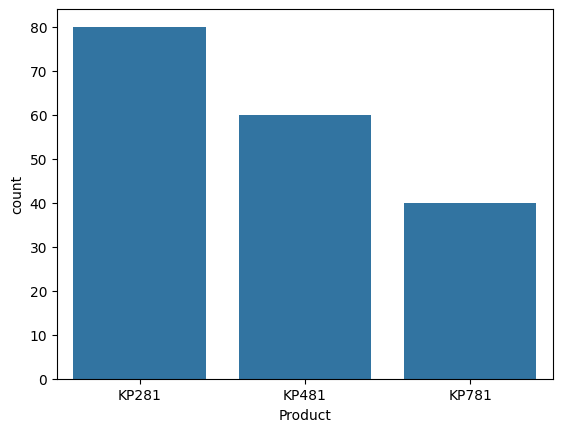

In [25]:
sns.countplot(data = df_aerofit, x = "Product")

plt.show()

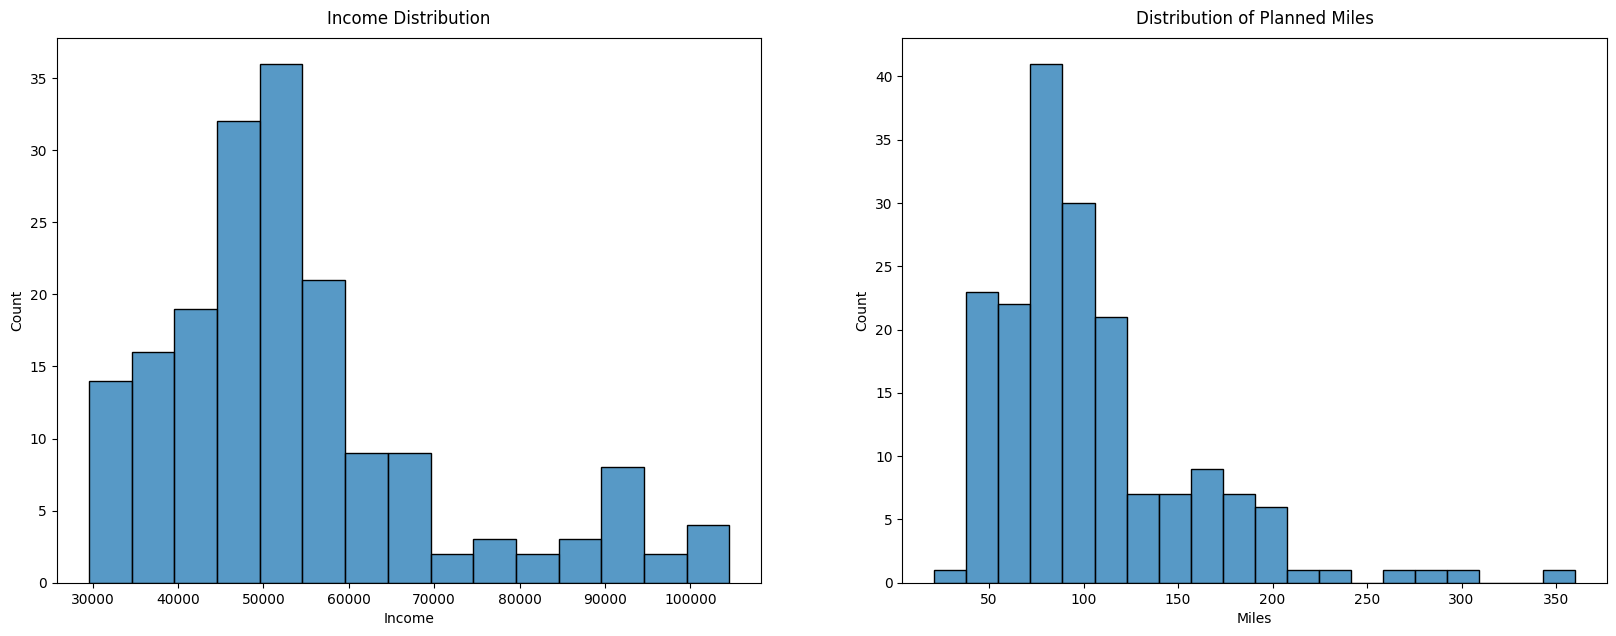

In [46]:
# Income distribution of customers

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_aerofit, x="Income", ax=axis[0])

axis[0].set_title("Income Distribution", pad=10)
axis[1].set_title("Distribution of Planned Miles", pad=10)

# plt.title('Customer Income Distribution')
sns.histplot(data=df_aerofit, x="Miles", ax=axis[1])


plt.show()

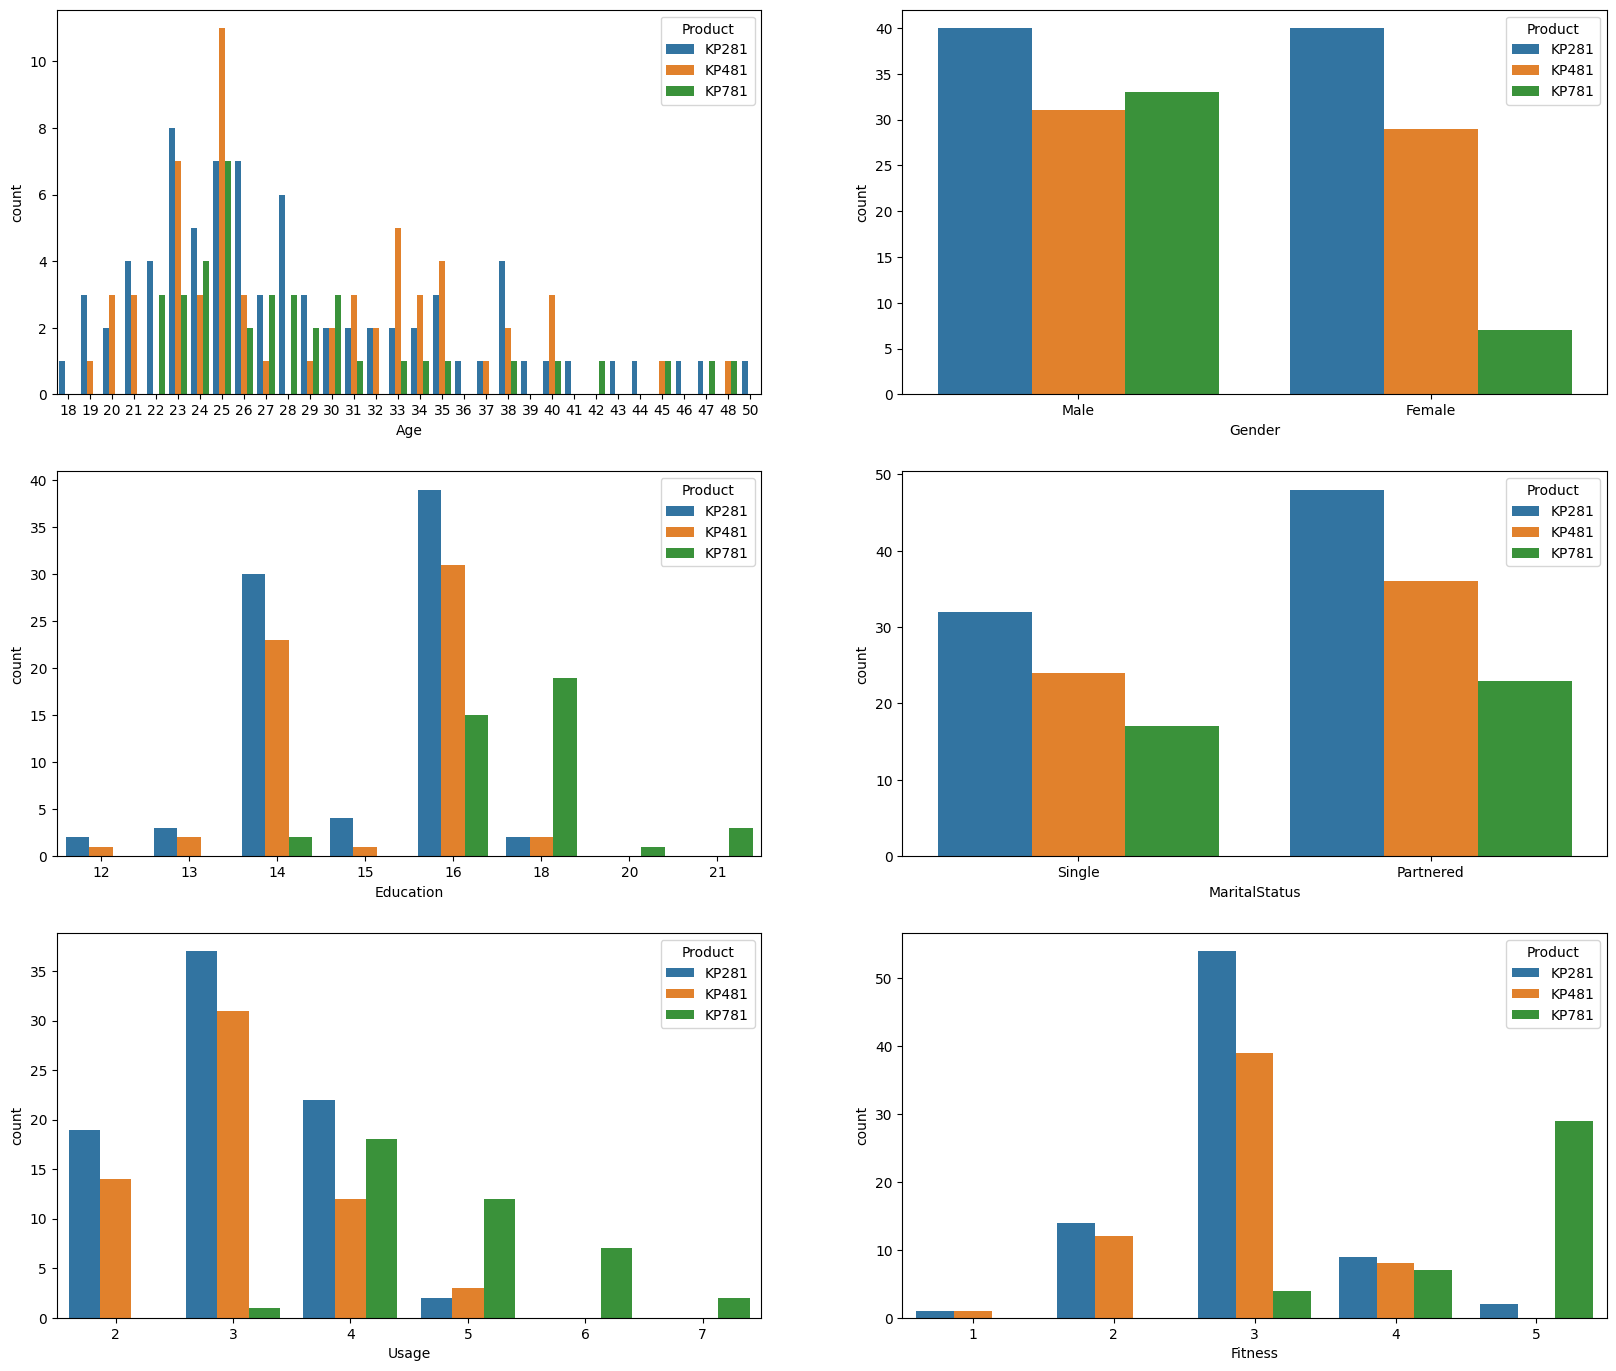

In [37]:
# Create 

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df_aerofit, x="Age", hue="Product", ax=axis[0,0])
sns.countplot(data=df_aerofit, x="Gender", hue="Product", ax=axis[0,1])
sns.countplot(data=df_aerofit, x="Education", hue="Product", ax=axis[1,0])
sns.countplot(data=df_aerofit, x='MaritalStatus', hue="Product", ax=axis[1,1])
sns.countplot(data=df_aerofit, x='Usage', hue="Product", ax = axis[2,0])
sns.countplot(data=df_aerofit, x='Fitness', hue="Product", ax = axis[2,1])

plt.show()

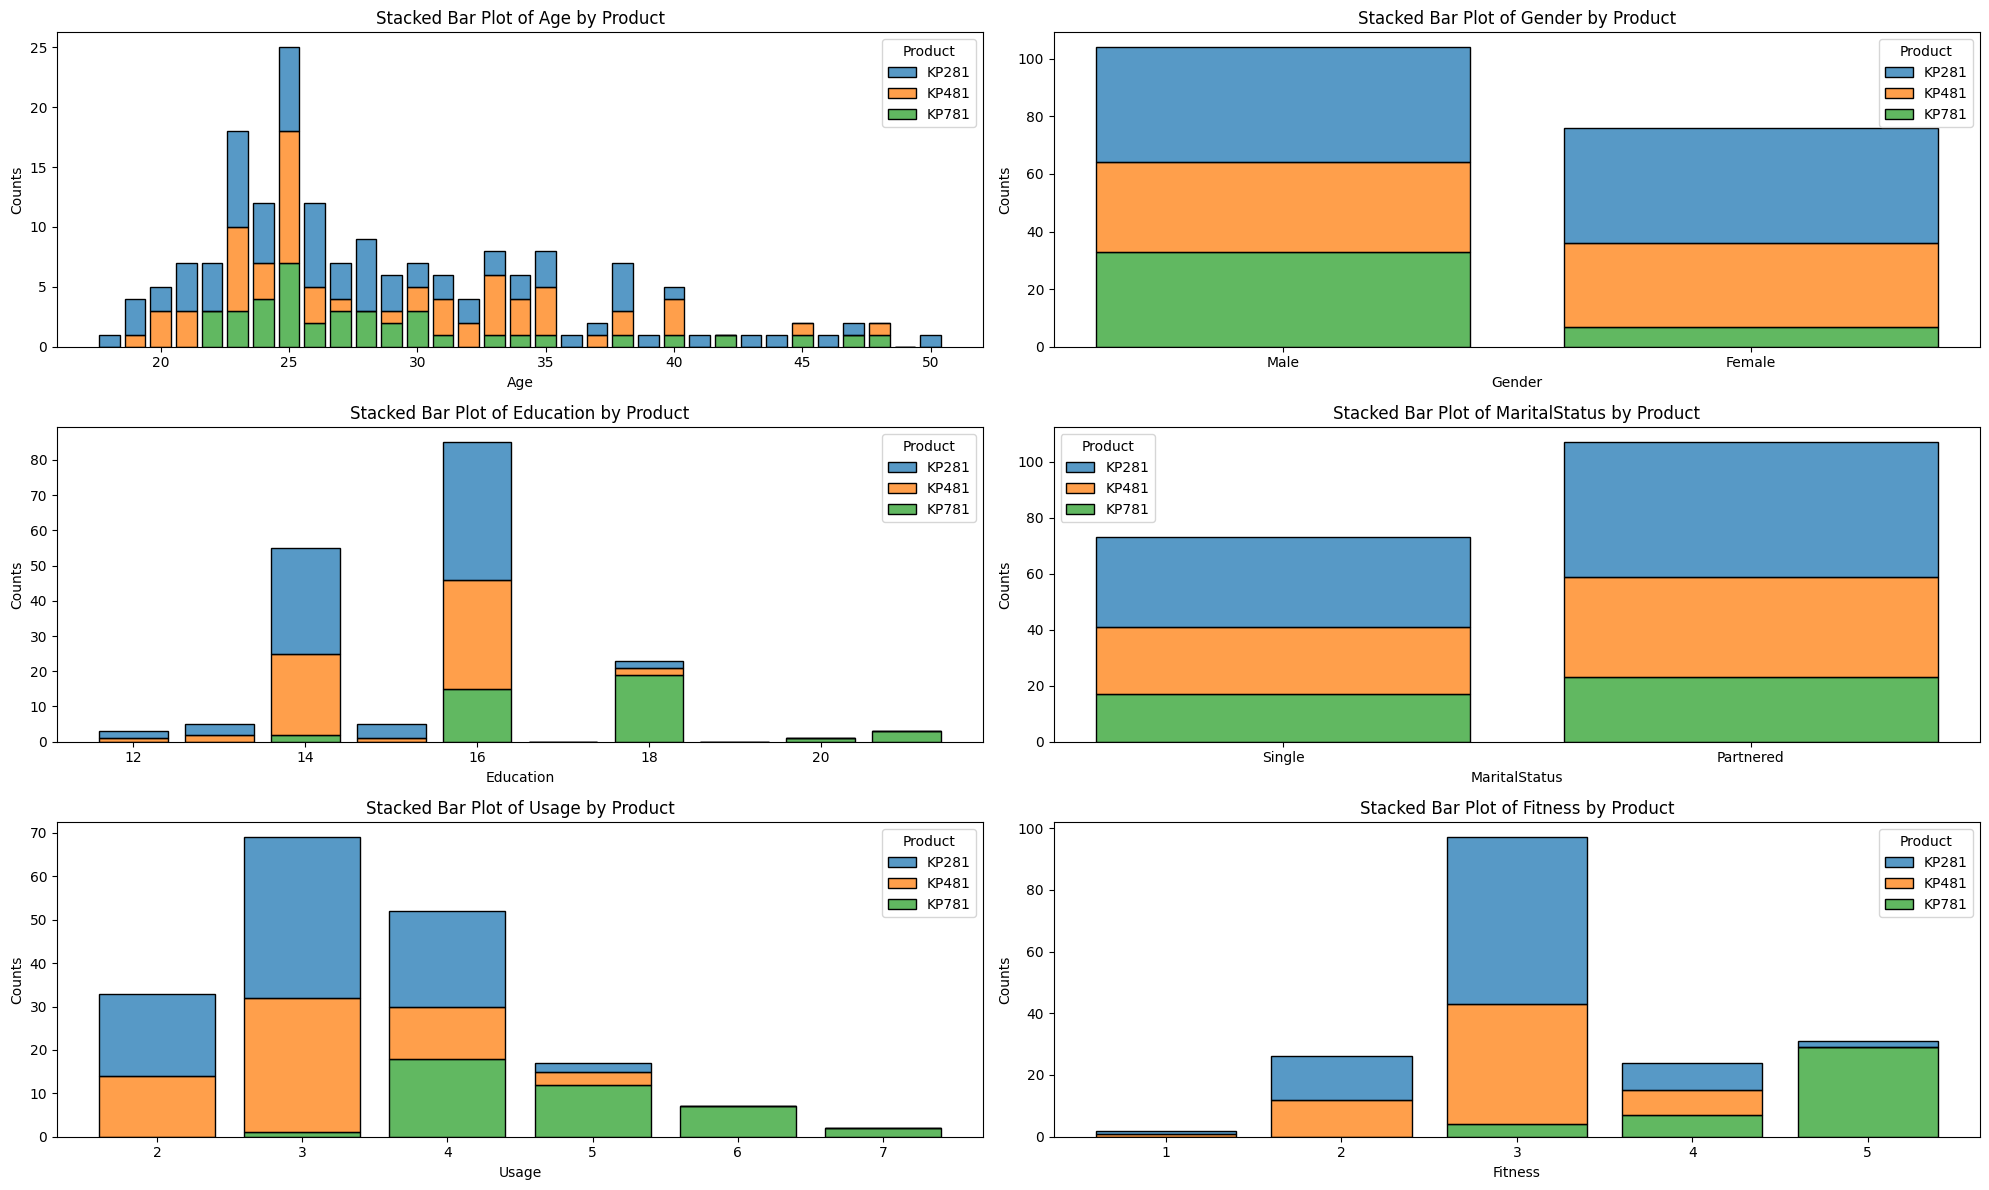

In [15]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

# List of features
features = ["Age", "Gender", "Education", "MaritalStatus", "Usage", "Fitness"]

# Adjust the figure layout
fig.subplots_adjust(top=1.2, hspace=0.5, wspace=0.5)

for ax, feature in zip(axis.flatten(), features):
    # Use histplot with discrete bins and stack the different 'Product' values
    sns.histplot(data=df_aerofit, x=feature, hue='Product', multiple='stack', discrete=True, shrink=0.8, ax=ax)
    
    # Set titles and labels for better clarity
    ax.set_title(f'Stacked Bar Plot of {feature} by Product')
    ax.set_xlabel(feature)
    ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

- KP281 and KP481 popular among light and moderate users, frequent users prefer KP781


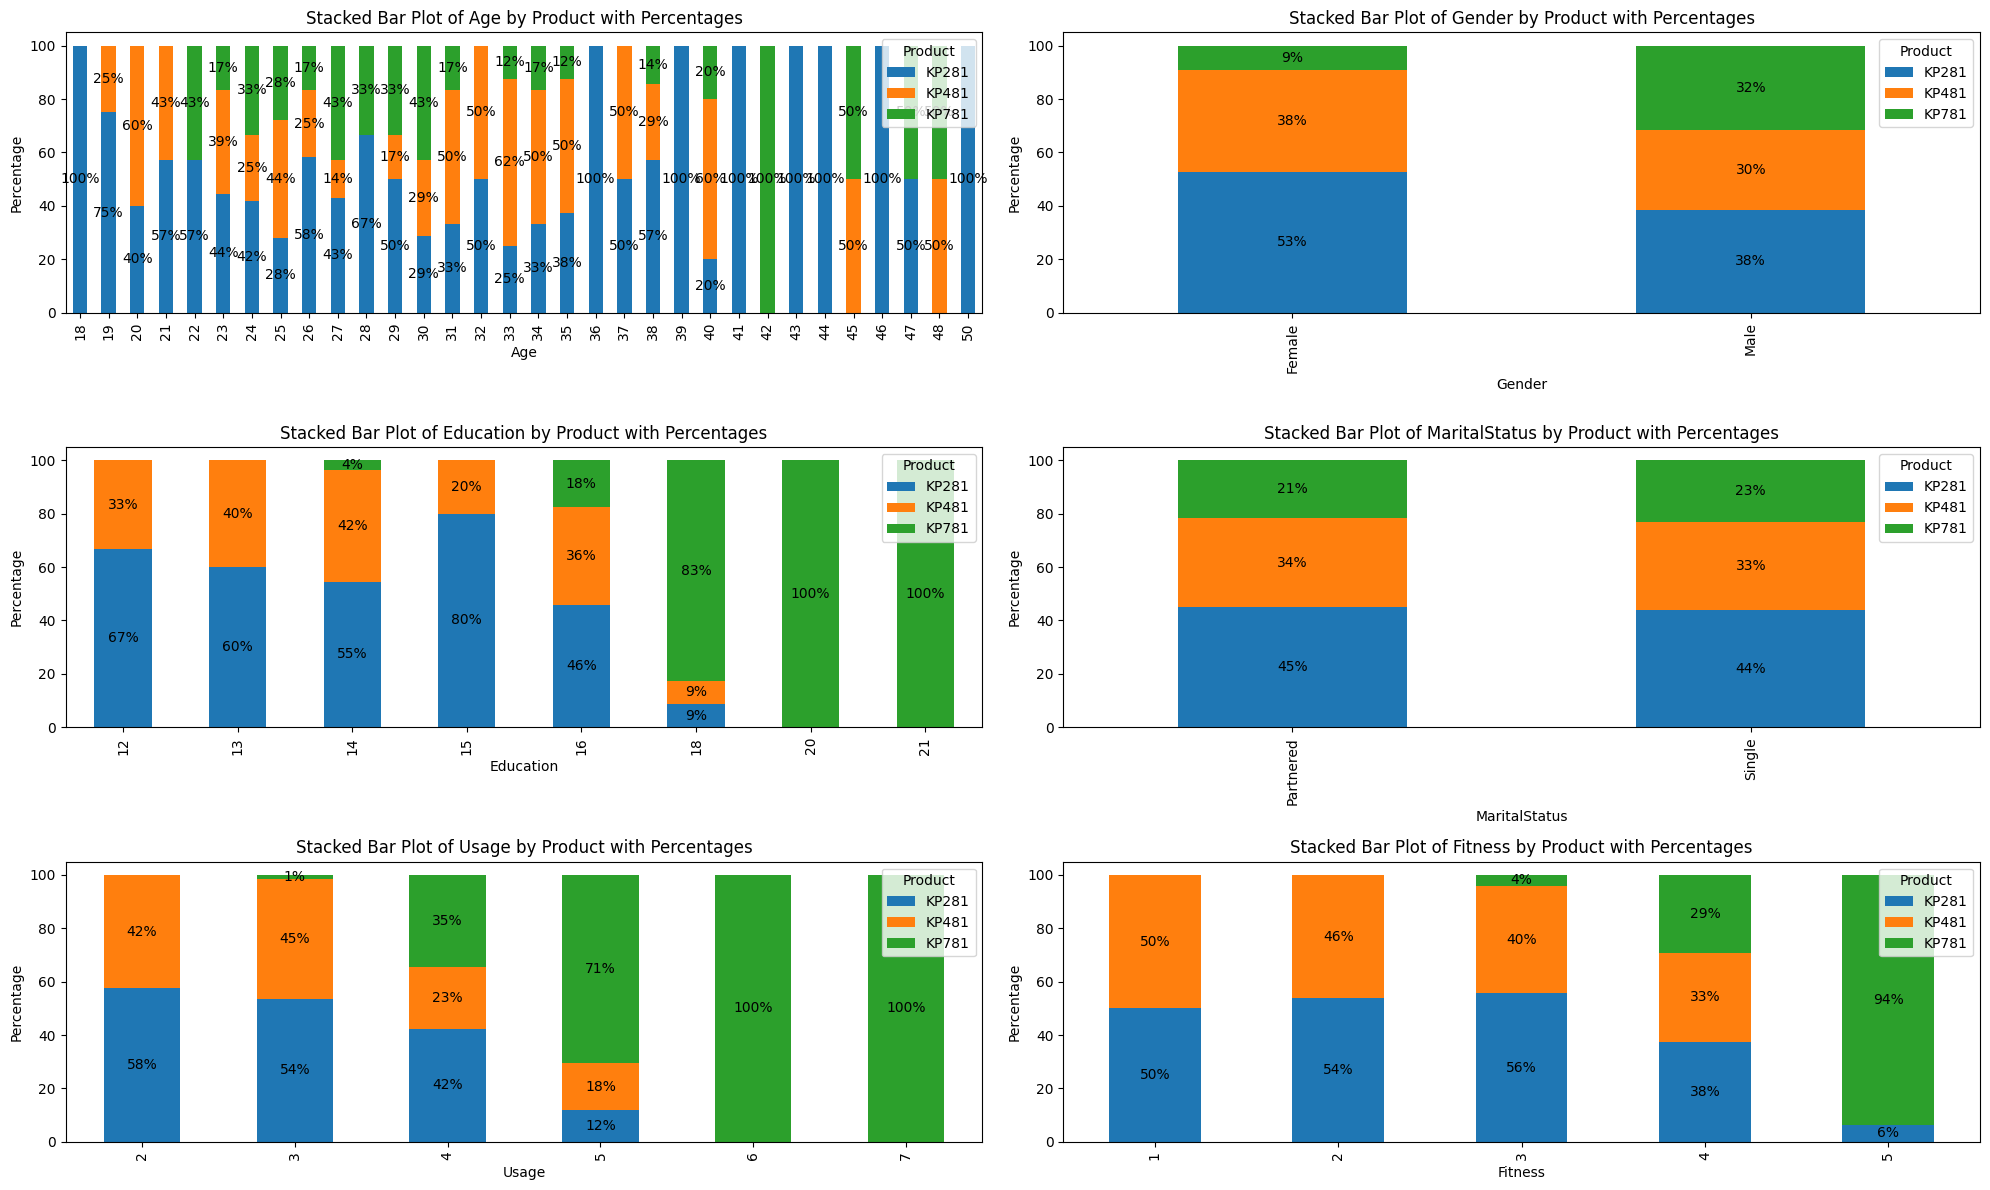

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame setup
# Assuming df_aerofit is already loaded and contains columns 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', and 'Product'

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2, hspace=0.5, wspace=0.5)

features = ["Age", "Gender", "Education", "MaritalStatus", "Usage", "Fitness"]

for ax, feature in zip(axis.flatten(), features):
    # Calculating the count of each group
    group_counts = df_aerofit.groupby([feature, 'Product']).size().unstack().fillna(0)
    
    # Calculating percentage of each product within the groups
    group_percents = group_counts.divide(group_counts.sum(axis=1), axis=0) * 100
    
    # Plotting the stacked bars
    group_percents.plot(kind='bar', stacked=True, ax=ax)
    
    # Annotating the percentages on the bars
    for c in ax.containers:
        labels = [f'{w:.0f}%' if w > 0 else '' for w in c.datavalues]
        ax.bar_label(c, labels=labels, label_type='center')
    
    # Setting titles and labels
    ax.set_title(f'Stacked Bar Plot of {feature} by Product with Percentages')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()


In [23]:
# Split/Difference among men and women who are partnered vs single


pd.crosstab(index=[df_aerofit["Gender"],df_aerofit["Product"]],columns=df_aerofit["MaritalStatus"],margins=True)

MaritalStatus   Partnered  Single  All
Gender Product                        
Female KP281           27      13   40
       KP481           15      14   29
       KP781            4       3    7
Male   KP281           21      19   40
       KP481           21      10   31
       KP781           19      14   33
All                   107      73  180

/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_12514/878614016.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/pivot_data.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_12514/878614016.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = [f'{v.get_height()} ({v.get_height()/pivot_data.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
/var/folders/6y/k8lhf01n6w55fgk1gsgpfpfw0000gn/T/ipykernel_12514/878614016.py:28: Future

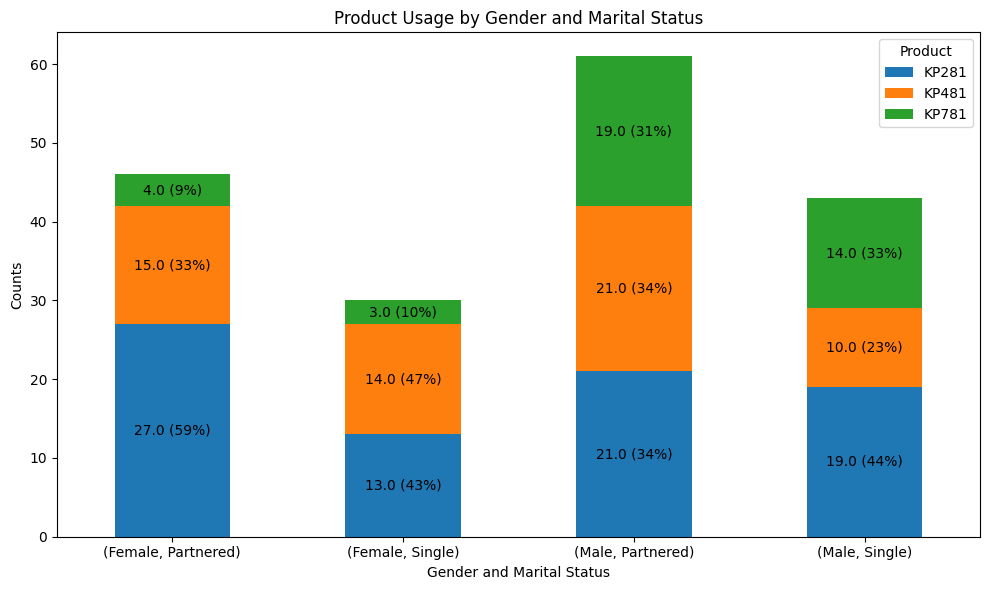

In [24]:
# 1. Group the data by Gender, MaritalStatus, and Product, and count occurrences
grouped_data = df_aerofit.groupby(['Gender', 'MaritalStatus', 'Product']).size().reset_index(name='count')

# 2. Get total counts by Gender and MaritalStatus to scale the bar heights according to the total counts in each subgroup
total_counts = df_aerofit.groupby(['Gender', 'MaritalStatus']).size().reset_index(name='total_count')

# 3. Merge total counts back to grouped data
grouped_data = pd.merge(grouped_data, total_counts, on=['Gender', 'MaritalStatus'])

# 4. Calculate percentage for stacking
grouped_data['percentage'] = grouped_data['count'] / grouped_data['total_count'] * 100

# 5. Pivot data for plotting
pivot_data = grouped_data.pivot_table(index=['Gender', 'MaritalStatus'], columns='Product', values='count', fill_value=0)

# 6. Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Adding labels for actual counts on bars
for c in ax.containers:
    # Optional: Format the label to show as 'count (percentage%)'
    labels = [f'{v.get_height()} ({v.get_height()/pivot_data.sum(axis=1)[i]*100:.0f}%)' if v.get_height() > 0 else '' for i, v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_title('Product Usage by Gender and Marital Status')
ax.set_xlabel('Gender and Marital Status')
ax.set_ylabel('Counts')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for better readability
plt.tight_layout()
plt.show()


- The KP281 model is much more popular among married women than those who are single
- The KP481 is more popular among single women than partnered on the contrary it is more popular among married men than single
- The KP781 variant is not popular among women, amongst men the buying patterns are similar between those who are single and partnered
